# Parameters

In [11]:
dataset_name = 'wn18'

symbolic_name = 'AnyBURL'
symbolic = 'anyburl'

subsymbolic_name = 'ComplEx'
subsymbolic = 'complex'

bp_threshold = 5
relation_class_threshold = 0.7

# Imports

In [12]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Load Data

In [13]:
df = get_prediction_data(dataset_name, symbolic, subsymbolic)
df.head(10)

formatted predictions don't exist yet. Creating...
libkge...
experiments\wn18_complex_1\test_results\trace.yaml...
Couldn't process line: 
{"batches": "20", "entry_id": "19dbc7a9-8bed-4c23-9720-72607ef1510a", "epoch": "205", "epoch_time": "34.71787929534912", "event": "eval_completed", "filter_splits": ["train", "valid", "test"], "hits_at_1": "0.4506", "hits_at_10": "0.8062", "hits_at_100": "0.9306000000000001", "hits_at_1000": "0.9734", hits_at_1000_1-"1": "0.9761904761904762", hits_at_1000_1-"N": "0.9723876556578236", hits_at_1000_M-"1": "0.9765270065623423", hits_at_1000_M-"N": "0.9694690265486725", "hits_at_1000_filtered": "0.9734", hits_at_1000_filtered_1-"1": "0.9761904761904762", hits_at_1000_filtered_1-"N": "0.9723876556578236", hits_at_1000_filtered_M-"1": "0.9765270065623423", hits_at_1000_filtered_M-"N": "0.9694690265486725", hits_at_100_1-"1": "0.9761904761904762", hits_at_100_1-"N": "0.9209528965890634", hits_at_100_M-"1": "0.919989904088844", hits_at_100_M-"N": "0.9632743

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,h,r,t,rank_filtered_kge,rank_filtered_0,rank_filtered_1,rank_filtered_2,rank_filtered_3,rank_filtered_4
0,6,0,2272,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0,2272,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,0,11182,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,0,11182,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,0,17644,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,0,17644,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,19822,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,0,19822,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,9,12343,False,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,9,12343,True,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge']]
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,rank_filtered_kge
0,6,0,2272,False,1,NaN
1,6,0,2272,True,1,NaN
2,6,0,11182,False,1,NaN
3,6,0,11182,True,1,NaN
4,7,0,17644,False,1,NaN
5,7,0,17644,True,1,NaN
6,7,0,19822,False,1,NaN
7,7,0,19822,True,1,NaN
8,11,9,12343,False,None,NaN
9,11,9,12343,True,25,NaN


## drop NAs (why are there NAs at all?)

In [15]:
len(df)

10000

In [16]:
df['rank_filtered_anyburl'].isnull().sum()

217

In [17]:
df['rank_filtered_kge'].isnull().sum()

10000

In [18]:
df = df.dropna()

In [19]:
len(df)

0

# Analysis

## create PDF

In [20]:
pdf = PdfPages(f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf')

## show graphs

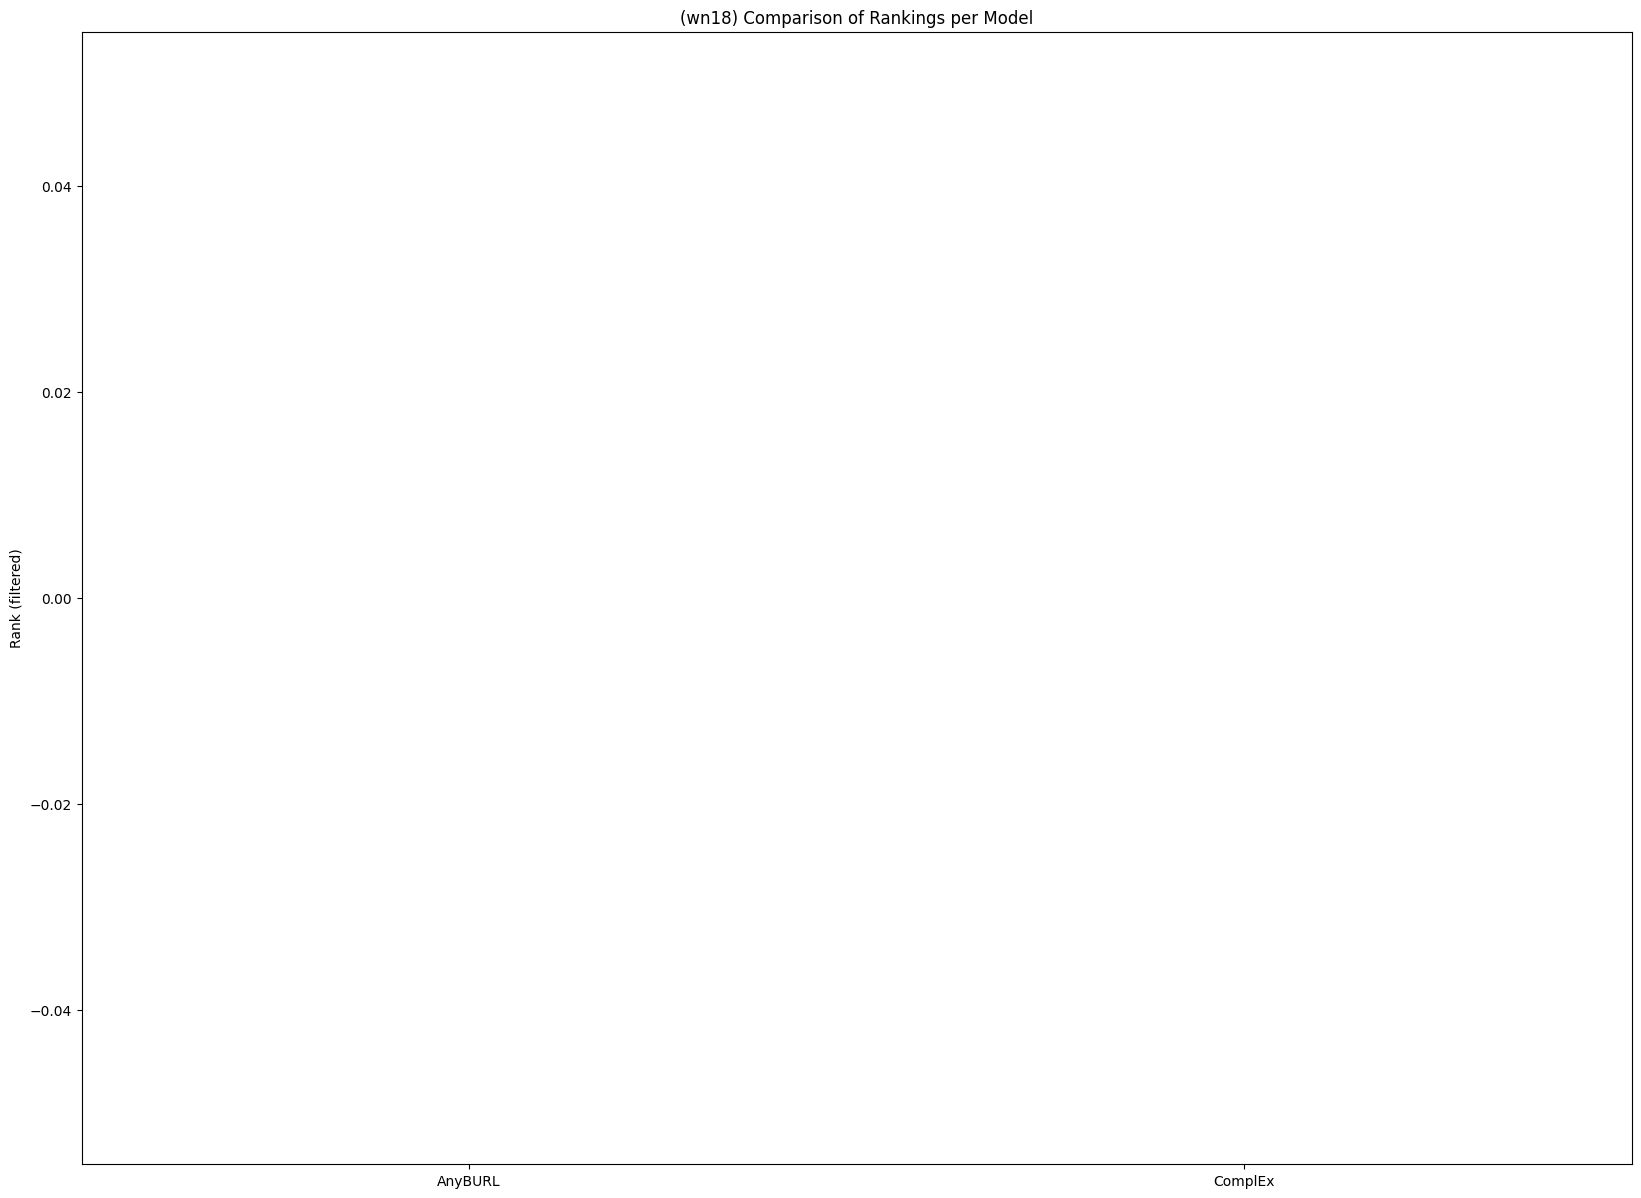

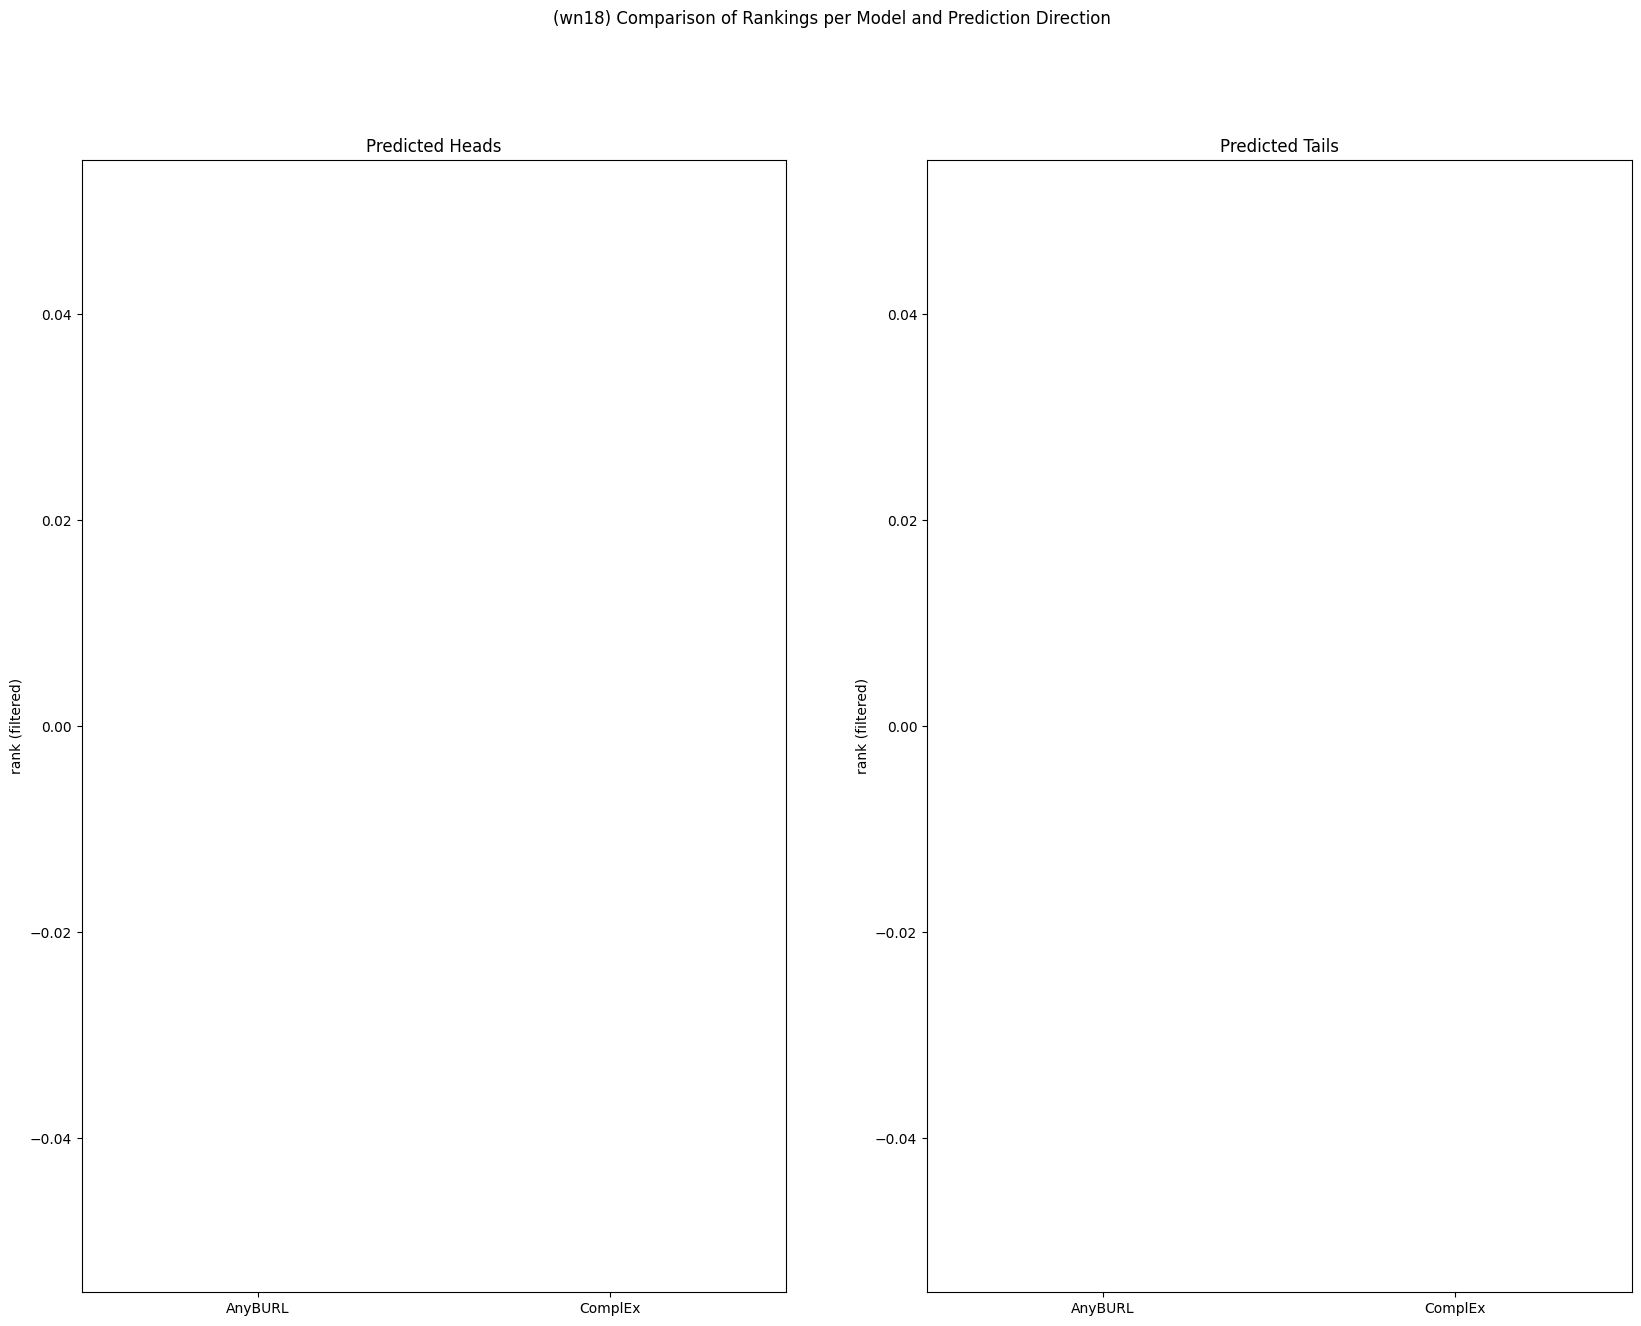

ValueError: Expected a 1D array, got an array with shape (0, 7)

In [21]:
show_all_graphs(df, dataset_name, bp_threshold, relation_class_threshold)

## close PDF

In [ ]:
pdf.close()